<a href="https://colab.research.google.com/github/fedhere/PUS2024/blob/main/ClassDemos/Part_I_GeospatialAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# reproducible Spatial Data Analysis with pandas
Exploratory spatial data analysis of CitiBike data using pysal and geopandas

N.B. This workbook is based on one by SRK325. Choropleths and spatial join sections added by CMP670.

## Import initial libraries

In [1]:
!pip install geopandas
!apt install python3-rtree


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6 python3-rtree
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 365 kB of archives.
After this operation, 1,799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 python3-rtree all 0.9.7-1 [46.4 kB]
Fetched 365 kB in 1s (459 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading 

In [2]:
import geopandas as gpd
gpd.datasets.available

[]

In [3]:
url = "https://github.com/nvkelso/natural-earth-vector/raw/refs/heads/master/110m_cultural/ne_110m_admin_0_countries.shp"

In [4]:
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(url)

In [5]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 217.2+ KB


In [6]:
world.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

In [7]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [8]:
for c in world.columns:
    print(c)

featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
TLC
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG
BRK_A3
BRK_NAME
BRK_GROUP
ABBREV
POSTAL
FORMAL_EN
FORMAL_FR
NAME_CIAWF
NOTE_ADM0
NOTE_BRK
NAME_SORT
NAME_ALT
MAPCOLOR7
MAPCOLOR8
MAPCOLOR9
MAPCOLOR13
POP_EST
POP_RANK
POP_YEAR
GDP_MD
GDP_YEAR
ECONOMY
INCOME_GRP
FIPS_10
ISO_A2
ISO_A2_EH
ISO_A3
ISO_A3_EH
ISO_N3
ISO_N3_EH
UN_A3
WB_A2
WB_A3
WOE_ID
WOE_ID_EH
WOE_NOTE
ADM0_ISO
ADM0_DIFF
ADM0_TLC
ADM0_A3_US
ADM0_A3_FR
ADM0_A3_RU
ADM0_A3_ES
ADM0_A3_CN
ADM0_A3_TW
ADM0_A3_IN
ADM0_A3_NP
ADM0_A3_PK
ADM0_A3_DE
ADM0_A3_GB
ADM0_A3_BR
ADM0_A3_IL
ADM0_A3_PS
ADM0_A3_SA
ADM0_A3_EG
ADM0_A3_MA
ADM0_A3_PT
ADM0_A3_AR
ADM0_A3_JP
ADM0_A3_KO
ADM0_A3_VN
ADM0_A3_TR
ADM0_A3_ID
ADM0_A3_PL
ADM0_A3_GR
ADM0_A3_IT
ADM0_A3_NL
ADM0_A3_SE
ADM0_A3_BD
ADM0_A3_UA
ADM0_A3_UN
ADM0_A3_WB
CONTINENT
REGION_UN
SUBREGION
REGION_WB
NAME_LEN
LONG_LEN
ABBREV_LEN
TINY
HOMEPART
MIN_ZOOM
MIN_LABEL
MAX_LABEL
LABEL_X
LABEL_Y
NE_ID
WIKIDA

In [9]:
world = world[["POP_EST",	"CONTINENT", "ISO_A3", "NAME", "GDP_MD",	"geometry"]]
world.head()

,POP_EST,CONTINENT,ISO_A3,NAME,GDP_MD,geometry
0,889953.0,Oceania,FJI,Fiji,5496,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,58005463.0,Africa,TZA,Tanzania,63177,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,603253.0,Africa,ESH,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,CAN,Canada,1736425,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,328239523.0,North America,USA,United States of America,21433226,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [10]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

https://en.wikipedia.org/wiki/World_Geodetic_System

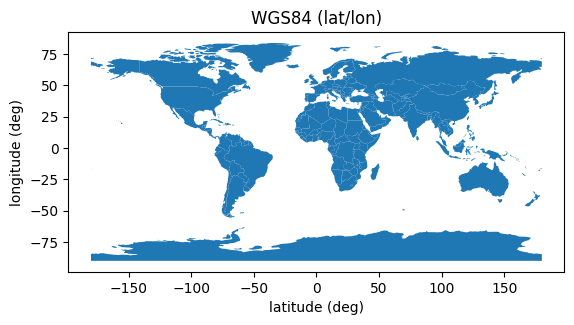

In [11]:
ax = world.plot()
ax.set_title("WGS84 (lat/lon)");
ax.set_xlabel("latitude (deg)")
ax.set_ylabel("longitude (deg)");

European Petroleum Survey Group (EPSG). Each entity is assigned an EPSG code between 1024-32767

## EPSG:4326
WGS 84 -- WGS84 - World Geodetic System 1984, used in GPS

Attributes
Unit: degree (supplier to define representation)

Geodetic CRS: WGS 84

Datum: World Geodetic System 1984 ensemble

Data source: EPSG

Information source: EPSG. See 3D CRS for original information source.

Revision date: 2020-03-14

Scope: Horizontal component of 3D system.

Area of use: World.

Coordinate system: Ellipsoidal 2D CS. Axes: latitude, longitude. Orientations: north, east.

UoM: degree

https://epsg.io/4326

_degrees measured upon the WGS84 ellipsoid using longitude and latitude easting from the Greenwich Meridian and Equator_

## EPSG:3395
Unit: metre

Geodetic CRS: WGS 84

Datum: World Geodetic System 1984 ensemble

Data source: EPSG

Information source: OGP

Revision date: 2020-03-14

Scope: Very small scale conformal mapping.

Remarks: Euro-centric view of world excluding polar areas.

Area of use: World between 80°S and 84°N.

Coordinate system: Cartesian 2D CS. Axes: easting, northing (E,N). Orientations: east, north. UoM: m.

https://epsg.io/3395

_meters northing and easting as measured upon the cylinder formed by projecting the WGS84 ellipsoid using a transverse mercator projection with a central meridian of -123 degrees excluding polar regions south of 80 and north of 84 degrees_

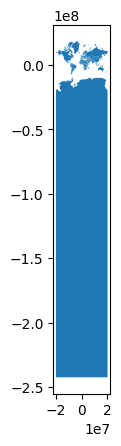

In [12]:
world.to_crs("EPSG:3395").plot();

Text(31.222222222222214, 0.5, 'meters northing')

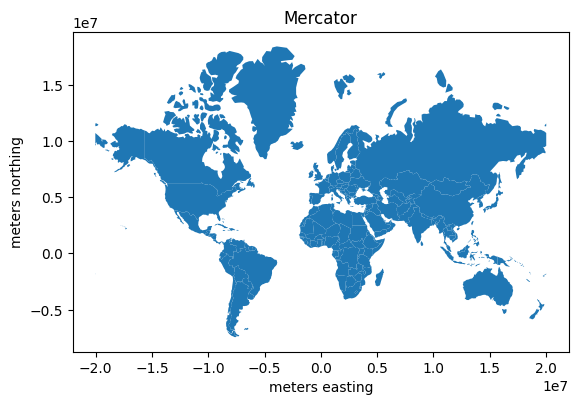

In [13]:
# Reproject to Mercator (after dropping Antartica)
world_nopoles = world[(world.NAME != "Antarctica") & (world.NAME != "Fr. S. Antarctic Lands")]

world_nopoles = world_nopoles.to_crs("EPSG:3395") # world.to_crs(epsg=3395) would also work

ax = world_nopoles.plot()

ax.set_title("Mercator");
ax.set_xlabel("meters easting")
ax.set_ylabel("meters northing")

http://ww01.lyzidiamond.com/?dn=lyzidiamond.com&pbsubid=bd35ea12-7b36-464e-99b5-720ef0c163de&pid=9POT3387I


## EPSG:3407

Hong Kong 1963 Grid System

Attributes
Unit: Clarke's foot

Geodetic CRS: Hong Kong 1963

Datum: Hong Kong 1963

Ellipsoid: Clarke 1858

Prime meridian: Greenwich

Data source: EPSG

https://epsg.io/3407

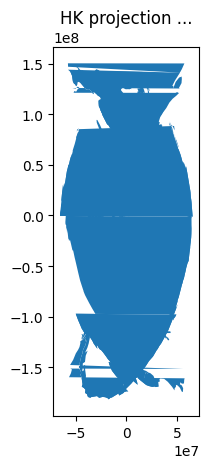

In [14]:
ax = world_nopoles.to_crs("EPSG:3407").plot() # hong kong projection

ax.set_title("HK projection ...");

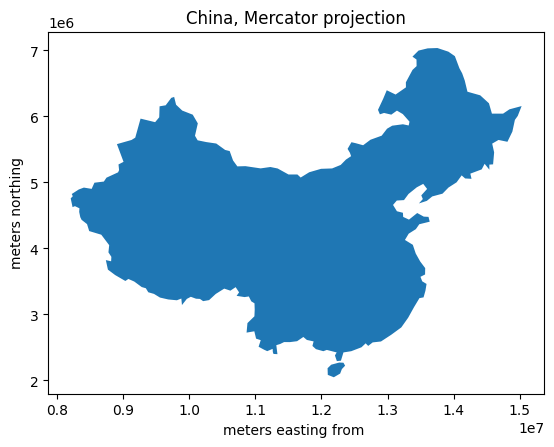

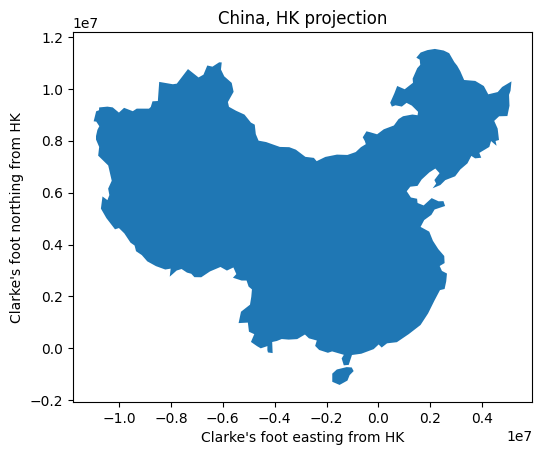

In [15]:
ax = world[world.NAME == "China"].to_crs("EPSG:3395").plot() # Mercator projection
ax.set_title("China, Mercator projection");
ax.set_xlabel("meters easting from ")
ax.set_ylabel("meters northing")

ax = world[world.NAME == "China"].to_crs("EPSG:3407").plot() # hong kong projection
ax.set_title("China, HK projection");
ax.set_xlabel("Clarke's foot easting from HK")
ax.set_ylabel("Clarke's foot northing from HK");

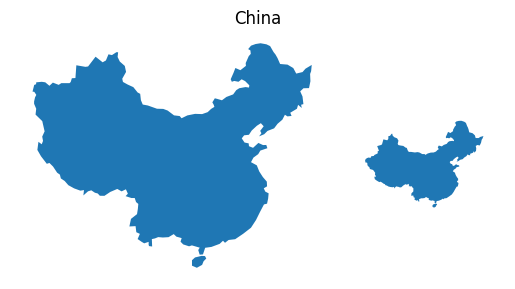

In [16]:
ax = world[world.NAME == "China"].to_crs("EPSG:3857").plot()
ax = world[world.NAME == "China"].to_crs("EPSG:3407").plot(ax=ax) # hong kong projection
ax.set_title("China");
ax.axis('off');

In [17]:
world.head()

,POP_EST,CONTINENT,ISO_A3,NAME,GDP_MD,geometry
0,889953.0,Oceania,FJI,Fiji,5496,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,58005463.0,Africa,TZA,Tanzania,63177,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,603253.0,Africa,ESH,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,CAN,Canada,1736425,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,328239523.0,North America,USA,United States of America,21433226,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [18]:
world.set_index("NAME", inplace=True)
world

,POP_EST,CONTINENT,ISO_A3,GDP_MD,geometry
NAME,,,,,
Fiji,889953.0,Oceania,FJI,5496,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
Tanzania,58005463.0,Africa,TZA,63177,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
W. Sahara,603253.0,Africa,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,37589262.0,North America,CAN,1736425,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
United States of America,328239523.0,North America,USA,21433226,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...
Serbia,6944975.0,Europe,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
Montenegro,622137.0,Europe,MNE,5542,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
Kosovo,1794248.0,Europe,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


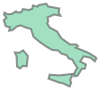

In [19]:
# a multipolygon
world.loc["Italy", "geometry"]

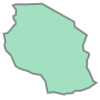

In [20]:
# a polygon
world.loc["Tanzania", "geometry"]

<Axes: >

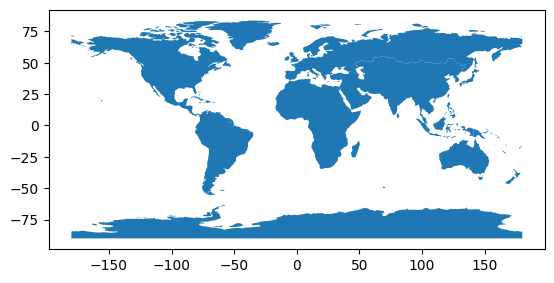

In [21]:
world.dissolve("CONTINENT").plot()

https://catalog.data.gov/dataset/tiger-line-shapefile-2019-2010-nation-u-s-2010-census-urban-area-national

In [23]:
cities = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2024/UAC20/tl_2024_us_uac20.zip")
cities.head()

,UACE20,GEOID20,GEOIDFQ20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,14482,14482,400C200US14482,"Casper, WY","Casper, WY Urban Area",67,G3500,S,72213481,859632,+42.8391477,-106.3367071,"MULTIPOLYGON (((-106.27308 42.8288, -106.27308..."
1,81604,81604,400C200US81604,"Sheridan, WY","Sheridan, WY Urban Area",67,G3500,S,33638046,49823,+44.7865750,-106.9619773,"MULTIPOLYGON (((-106.95562 44.82931, -106.9554..."
2,18397,18397,400C200US18397,"Cody, WY","Cody, WY Urban Area",67,G3500,S,17893069,29888,+44.5246958,-109.0502125,"MULTIPOLYGON (((-109.05647 44.51664, -109.0569..."
3,89488,89488,400C200US89488,"Union, SC","Union, SC Urban Area",67,G3500,S,23763897,8766,+34.7247912,-081.6262933,"MULTIPOLYGON (((-81.59001 34.71101, -81.59056 ..."
4,01684,01684,400C200US01684,"Alpena, MI","Alpena, MI Urban Area",67,G3500,S,32911444,1992202,+45.0495900,-083.4535730,"MULTIPOLYGON (((-83.40797 45.06554, -83.40832 ..."


<Axes: >

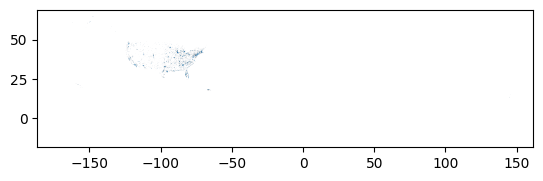

In [24]:
cities.plot()

In [25]:
cities.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [26]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

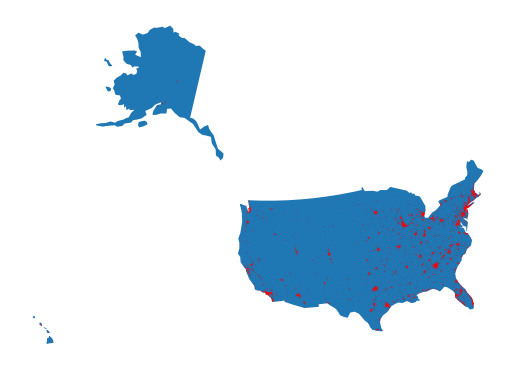

In [35]:
us = world[world.index == "United States of America"]
cities = cities.to_crs("EPSG:26945")
us = us.to_crs("EPSG:26945")
ax = us.plot()
xlims = ax.get_xlim()
ylims = ax.get_ylim()
cities.plot(ax=ax, color="red")
ax.set_xlim(xlims)
ax.set_ylim(ylims);
ax.axis("off");

In [ ]:
ax = us.plot()
cities.plot(ax=ax, color="red")